## Loading Data


### Load all 39 years of ERA-Interim 3-hourly `tas` data

ERA-Interim is stored under `/g/data/ub4`

The variable for surface air temperature is `tas`, which you can find under `/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas*.nc`.

If you can't access ERA-Interim, try the ACCESS CMIP5 data under `/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/3hr/atmos/3hr/r1i1p1/latest/tas/tas*.nc`

If you're working on your laptop instead of VDI, you can access data remotely over OpenDAP - `http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc`

#### Answer
```
import xarray
erai_tas = xarray.open_mfdataset('/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas*.nc')
```
    
[Xarray docs: netCDF](http://xarray.pydata.org/en/stable/io.html#netcdf)

In [1]:
erai_tas_path = '/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas*.nc'
cmip_tas_path = '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/3hr/atmos/3hr/r1i1p1/latest/tas/tas*.nc'
cmip_tas_dap  = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc'

! ls {erai_tas_path} | head

/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790101_19790131.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790201_19790228.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790301_19790331.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790401_19790430.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790501_19790531.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790601_19790630.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790701_19790731.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790801_19790831.nc
/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/tas_3hrs_ERAI_historical_fc-sfc_19790901_19790930.nc
/g/data/ub4/erai/netcdf/3hr/atmos/ope

In [2]:
%%time

import xarray
erai_tas = xarray.open_mfdataset(erai_tas_path, chunks={'time':100})
print(erai_tas)

<xarray.Dataset>
Dimensions:  (lat: 241, lon: 480, time: 114920)
Coordinates:
  * lat      (lat) float64 90.0 89.25 88.5 87.75 87.0 86.25 85.5 84.75 84.0 ...
  * lon      (lon) float64 -180.0 -179.2 -178.5 -177.8 -177.0 -176.2 -175.5 ...
  * time     (time) datetime64[ns] 1979-01-01T03:00:00 1979-01-01T06:00:00 ...
Data variables:
    tas      (time, lat, lon) float32 dask.array<shape=(114920, 241, 480), chunksize=(100, 241, 480)>
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Mon Aug 31 14:11:51 2015: ncks -O --md5_wrt_att -v tas 2T_1...
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...
    title:        ERA-Interim 2 metre temperature [K] forecast on surface (gl...
    institution:  ARCCSS ARC Centre of Excellence for Climate System Science ...
    source:       Original grib files obtained from http://apps.ecmwf.int/dat...
    references:   Please acknowledge both 

## Datasets


### Print the `tas` variable in the dataset - what is the variable's units?

Opening files with Xarray returns a `xarray.Dataset`. Xarray only reads the metadata to start off with, so it's fine to load giant amounts of data that you later filter down to a reasonable amount.

You can access variables, attributes and coordinates using Python attribute syntax - `object.attribute`.

```
print(erai_tas.tas.units)
```

[Xarray docs: Dataset contents](http://xarray.pydata.org/en/stable/data-structures.html#dataset-contents)

### How do the time coordinate attributes differ when you enable and disable time decoding?

The time coordinate is special - Xarray converts the values in the file (units of hours since 1901-01-01) to datetime objects. You can get an array of e.g. each time's month numbers using `time.dt.month`. The same works for `year`, `day`, `hour` etc.

This behaviour can be disabled by adding a parameter `decode_times=False` when you are opening the file:
```
xarray.open_dataset('/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/'
                    'tas_3hrs_ERAI_historical_fc-sfc_19790101_19790131.nc',
                    decode_times=False)
```

#### Answer
```
print(xarray.open_dataset('/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/'
                    'tas_3hrs_ERAI_historical_fc-sfc_19790101_19790131.nc',
                    decode_times=False).time)
                    
print(xarray.open_dataset('/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/'
                    'tas_3hrs_ERAI_historical_fc-sfc_19790101_19790131.nc',
                    decode_times=True).time)
```

[Xarray docs: Reading encoded data](http://xarray.pydata.org/en/stable/io.html#reading-encoded-data)

## DataArrays

If you access one of the variables in the dataset, you'll get a DataArray. Just like the dataset this has coordinates and attributes, however it also works as a numpy array - you can slice it, apply math functions etc.

At the moment, since our dataset is so large, the numpy array is hidden behind a `dask.array` object. If we slice down the array we can see its values (this is really only needed if we want to print the array).

<span style="background-color:yellow;">⚠️ Beware of loading ginormous arrays into memory with `.values`, always slice them down first ⚠️</span>

[Xarray docs: DataArray](http://xarray.pydata.org/en/stable/data-structures.html#dataarray)  
[Xarray docs: Dask](http://xarray.pydata.org/en/stable/dask.html)

In [3]:
tas = erai_tas.tas

print(tas)
print()
print(tas[1,2,3].values)

<xarray.DataArray 'tas' (time: 114920, lat: 241, lon: 480)>
dask.array<shape=(114920, 241, 480), dtype=float32, chunksize=(100, 241, 480)>
Coordinates:
  * lat      (lat) float64 90.0 89.25 88.5 87.75 87.0 86.25 85.5 84.75 84.0 ...
  * lon      (lon) float64 -180.0 -179.2 -178.5 -177.8 -177.0 -176.2 -175.5 ...
  * time     (time) datetime64[ns] 1979-01-01T03:00:00 1979-01-01T06:00:00 ...
Attributes:
    standard_name:  air_temperature
    long_name:      2 metre temperature 
    units:          K
    code:           167
    table:          128

243.74388


## Subsetting data

### Create a variable `tas_nino34`, which contains `tas` in the [NINO3.4](http://www.bom.gov.au/climate/enso/indices/about.shtml) area

The `.sel()` method on a DataArray or Dataset allows you to filter the selection based on the coordinate value. The arguments to the method should be the coordinate values to use: `tas.sel(lat=30.5)`. If selecting a single value it's a good idea to add the argument `method='nearest'` to get the nearest grid point to the given value.

To select a range of values combine `.sel()` with `slice()`, e.g. `tas.sel(lon=slice(60.0, 80.0))`

`.sel()` returns a view of the original Dataset or DataArray.

```
tas_nino34 = tas.sel(lat=slice(5,-5), lon=slice(-170,-120))
```

Note that `lat` goes from north to south, and `lon` is in degrees east

    
[Xarray docs: Indexing with dimension names](http://xarray.pydata.org/en/stable/indexing.html#indexing-with-dimension-names)

In [4]:
tas_nino34 = tas.sel(lat=slice(5,-5), lon=slice(-170,-120))

### Plot a single time value of the selected area onto a map

Cartopy adds map plotting and projection tools to Pyplot. Create a cartopy-enabled axis by passing in a [projection](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) when you create the axes: `ax = plt.axes(projection=ccrs.PlateCarree())` (Plate Carree is a regular lat-lon projection)

These axes can be passed in as the `ax` parameter of plotting functions.

Cartopy adds some useful methods to the axes - try `ax.coastlines()` and `ax.stock_img()`. `ax.set_global()` will set the bounds to the whole globe.

<span style="background-color:yellow;">⚠️ This will load the data from the files, make sure you select a single time value. Use the 'stop' button in the toolbar if this takes too long ⚠️</span>

#### Answer
```
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection = ccrs.PlateCarree())
tas_nino34.isel(time=0).plot(ax = ax)
ax.coastlines()
ax.set_global()
```
    
[Xarray docs: 2D Plotting](http://xarray.pydata.org/en/stable/plotting.html#two-dimensions)  
[Cartopy docs: Using cartopy with matplotlib](https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# ???

## Calculations

### Calculate the baseline by meaning `tas_nino34` between 1961 and 1990

Just like a numpy array you can calculate aggregate statistics using `.mean()`, `.stddef()`, etc. These functions can now take a list of dimensions to run the calculation over, instead of using axis numbers.

#### Answer
```
baseline = tas_nino34.sel(time=slice('1961','1990')).mean(['time', 'lat', 'lon'])
```
    
[Xarray docs: Aggregation](http://xarray.pydata.org/en/stable/computation.html#aggregation)

In [7]:
baseline = tas_nino34.sel(time=slice('1961', '1990')).mean()
baseline

<xarray.DataArray 'tas' ()>
dask.array<shape=(), dtype=float32, chunksize=()>

### Create a plot of the NINO3.4 index over the last decade

Xarray will automaticaly work out if it should create a one or two-dimensional plot based on the data, which is good for quick plotting.

#### Answer
```
nino34 = tas_nino34.mean(['lat','lon']).sel(time=slice('2008', None)) - baseline
nino34.plot()
```
    
[Xarray docs: 1D plotting](http://xarray.pydata.org/en/stable/plotting.html#one-dimension)

## Running in parallel

One of the really cool features of Xarray is how easy it is to run your analysis in parallel - all you need to do is start a `dask.distributed.Client`, then any calculation using a Dask array will be run in parallel.

Dask breaks up its arrays into chunks - you can modify the size of these chunks using the `chunks` argument to `xarray.open_mfdataset()`, e.g. `xarray.open_mfdataset(..., chunks={'time': 10})` will create a chunk every 10 timesteps. Changing the size of these chunks can effect the speed of parallel calculations

In [8]:
from dask.distributed import Client
c = Client()
c

Client Scheduler: tcp://127.0.0.1:39056 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 8 Memory: 33.67 GB


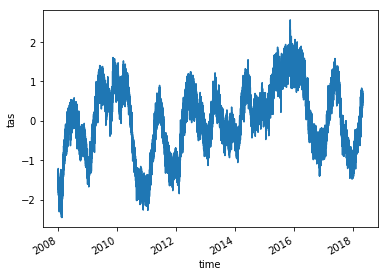

In [9]:
nino34 = tas_nino34.mean(dim=['lat', 'lon']) - baseline
nino34.sel(time=slice('2008','2018')).plot()

### Save the NINO3.4 timeseries to a new NetCDF file

Create a new Dataset containing the nino34 index you calculated.

Take a look at its metadata - does it have the correct variable name and units?

Check the [CF conventions](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#description-of-file-contents) for the file-level metadata that needs to be added to a file and add it to the dataset.

Once all the metadata looks correct, save it using `.to_netcdf()` and check the contents by running `ncdump -h` on the newly created file

#### Answer
```
nino34_dataset = xarray.Dataset({'nino34': nino34})
nino34_dataset.attrs['title'] = "NINO3.4 index calculated from ERA-Interim"
nino34_dataset.attrs['institution'] = "ARC Centre of Excellence for Climate Extremes"
nino34_dataset.attrs['source'] = "ECMWF ERA-Interim tas"
nino34_dataset.attrs['references'] = "http://www.bom.gov.au/climate/enso/indices/about.shtml"
nino34_dataset.attrs['history'] = "2018-07-11 Calculated using Jupyter notebook"

nino34_dataset.nino34.attrs['units'] = "K"

print(nino34_dataset)
print(nino34_dataset.nino34)

nino34_dataset.to_netcdf('nino34.nc', encoding={'nino34': {'zlib': True}})

! ncdump -h nino34.nc
```

You can run shell commands from Jupyter by starting a line with `!`


[Xarray docs: Writing encoded data](http://xarray.pydata.org/en/stable/io.html#writing-encoded-data)  
[netCDF4 docs: createVariable()](http://unidata.github.io/netcdf4-python/#netCDF4.Dataset.createVariable)

In [10]:
ds = nino34.sel(time='1990').to_dataset(name='nino34')

In [11]:
ds.attrs['title'] = 'ENSO 3.4 Index'

ds.nino34.attrs['units'] = 'deg_C'
ds.nino34.attrs['standard_name'] = '...'

ds.to_netcdf('enso34.nc')

### Apply the analysis to other datasets

Try running the ENSO analysis on a different CMIP5 model

Put the steps we've done so far to calculate the index into a function that takes a `tas` field as input and returns a ENSO 3.4 `DataArray`

In [12]:
def nino34(tas):
    tas_nino34 = tas.sel(lat=slice(5,-5), lon=slice(-170,-120))
    baseline = tas_nino34.sel(time=slice('1961', '1990')).mean()
    nino34 = tas_nino34.mean(dim=['lat', 'lon']) - baseline
    nino34.name = 'nino34'
    nino34.attrs['units'] = 'deg_C'
    
    return nino34

In [13]:
nino34(tas)

<xarray.DataArray 'nino34' (time: 114920)>
dask.array<shape=(114920,), dtype=float32, chunksize=(100,)>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T03:00:00 1979-01-01T06:00:00 ...
Attributes:
    units:    deg_C

# Extra stuff

## Changing times

You can open a file with `decode_times=False`, modify the time axis then call `xarray.decode_cf()` to work around errors in the time axis

Say you want to change the units from hours to days:

In [14]:
ds = xarray.open_dataset('/g/data/ub4/erai/netcdf/3hr/atmos/oper_fc_sfc/v01/tas/'
                    'tas_3hrs_ERAI_historical_fc-sfc_19790101_19790131.nc',
                    decode_times=False)
ds.time

<xarray.DataArray 'time' (time: 248)>
array([692499., 692502., 692505., ..., 693234., 693237., 693240.])
Coordinates:
  * time     (time) float64 6.925e+05 6.925e+05 6.925e+05 6.925e+05 ...
Attributes:
    standard_name:  time
    units:          hours since 1900-01-01 00:00:00
    calendar:       proleptic_gregorian
    MD5:            bd9169e5b5ef095218a7fc3236f439ea

In [15]:
ds['time'] = ds.time/24
ds.time.attrs['units'] = 'days since 1900-01-01 00:00:00'
ds.time

<xarray.DataArray 'time' (time: 248)>
array([28854.125, 28854.25 , 28854.375, ..., 28884.75 , 28884.875, 28885.   ])
Coordinates:
  * time     (time) float64 2.885e+04 2.885e+04 2.885e+04 2.885e+04 ...
Attributes:
    units:    days since 1900-01-01 00:00:00

In [16]:
ds2 = xarray.decode_cf(ds)
ds2.time

<xarray.DataArray 'time' (time: 248)>
array(['1979-01-01T03:00:00.000000000', '1979-01-01T06:00:00.000000000',
       '1979-01-01T09:00:00.000000000', ..., '1979-01-31T18:00:00.000000000',
       '1979-01-31T21:00:00.000000000', '1979-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T03:00:00 1979-01-01T06:00:00 ...

## Climatologies

A proper calculation of the index needs a climatology, not a static value.

You can create a climatology using the `.groupby()` function. This adds a new dimension to the dataset - here the number of days since the start of the year. You can then remove the other dimensions using `.mean()`.

To subtract the climatology from a dataset you also need to `.groupby()` the dataset - Xarray will pair up values with the same `dayofyear`.

Since I've got a sub-daily dataset I have to get the daily mean first, using `.resample(time='D').mean()`

Unfortunately it's easy to get errors when running with `dask.distributed` and climatologies - here I had to `.load()` the climatology first to get it to work.

If you do run into errors, first see if you can get it to work with a smaller dataset, and without `dask.distributed`. You can also email us at climate_help@nci.org.au for help if you can't work it out

In [17]:
climatology = tas_nino34.sel(time=slice('1961','1990')).groupby('time.dayofyear').mean(dim=['time','lat','lon'])

In [44]:
climatology.load()

<xarray.DataArray 'tas' (dayofyear: 366)>
array([298.92215, 298.89752, 298.91208, ..., 298.9375 , 298.92343, 298.073  ],
      dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...

In [45]:
nino34 = tas_nino34.mean(dim=['lat','lon']).resample(time='D').mean().groupby('time.dayofyear') - climatology

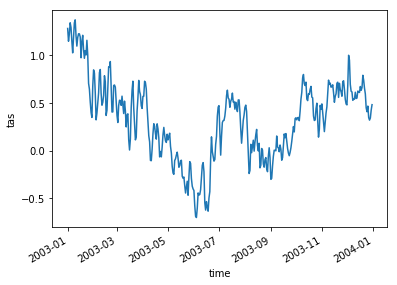

In [47]:
nino34.sel(time='2003').plot()